## Comparing calculated evapotranspiration with Klammler data

In [1]:
import pandas as pd
from etmodule.et0 import et0, et0_daily 
#Type of solar radiation input (global/net)
radiation = "globalr"
elevation = 266
latitude = 46.7
longitude = 15.56
#10min
min10 = pd.read_csv("data\\meteo_10min.csv", index_col = 0, parse_dates = True)

## Daily data

### Converting 10min  to daily data

In [2]:
#data_use["global"][data_use["global"]<0] = 0
data_day_mean = min10.resample("d").mean()
data_day_sum = min10.resample("d").sum()
data_day_max = min10.resample("d").max()
data_day_min = min10.resample("d").min()
data_day = pd.DataFrame(data_day_max["T"].values,data_day_mean.index, columns=['T_max'])
data_day["T_min"] = data_day_min["T"]
data_day["rh_min"] = data_day_min["rh"]
data_day["rh_max"] = data_day_max["rh"]
data_day["wind"] = data_day_mean["wind"]
data_day["solar"] = data_day_sum["global"] * 0.0006   
#data_day["T"] = data_day_mean["T"]
data_day["T"] = (data_day["T_min"] +data_day["T_max"])/2

In [3]:
fao_daily = et0(data_day, radiation, "day", elevation, latitude,longitude)

day
globalr
tunit = day


### Import Klammler data

In [21]:
start = "2006-06-01 00:00:00"
end = "2008-03-31 23:50:00"
gdata = pd.read_csv("data\\evap_fao.csv", index_col = 0, parse_dates = True)
g_use = gdata[start:end].copy()

### Plot data daily

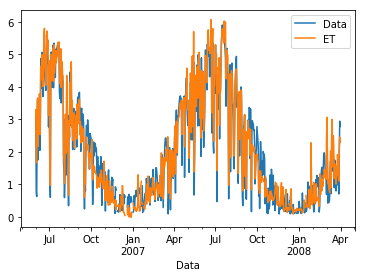

In [23]:
import matplotlib.pyplot as plt
g_use.plot()
fao_daily["ET"].plot(legend=True)
plt.show()

### Plot sums

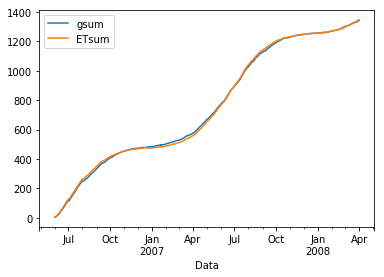

In [24]:
g_use["gsum"]=g_use["Data"].cumsum()
g_use["gsum"].plot(legend=True)
fao_daily["ETsum"] = fao_daily["ET"].cumsum()
fao_daily["ETsum"].plot(legend=True)
plt.show()

## Hourly data

### Converting 10-min to hourly

In [7]:
#data_use["global"][data_use["global"]<0] = 0
data_h_mean = min10.resample("h").mean()
data_h_sum = min10.resample("h").sum()
data_h_max = min10.resample("h").max()
data_h_min = min10.resample("h").min()
data_h = pd.DataFrame(data_h_max["T"].values,data_h_mean.index, columns=['T_max'])
data_h["T_min"] = data_h_min["T"]
#data_h["rh_min"] = data_h_min["rh"]
#data_h["rh_max"] = data_h_max["rh"]
data_h["wind"] = data_h_mean["wind"]
data_h["solar"] = data_h_sum["global"] * 0.0006
data_h["T"] = data_h_mean["T"]
data_h["rh"] = data_h_mean["rh"]
data_h = data_h.drop(columns=['T_min', 'T_max'])

In [30]:
fao_hour = (et0(data_h, radiation, "hourb", elevation, latitude,longitude))

globalr


### Plot data hourly

In [31]:
#g_use.plot()
#fao_daily["ET"].plot()
#plt.show()

### Plot sum hourly

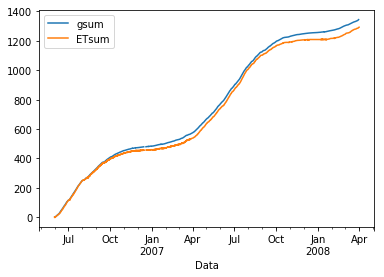

In [32]:
fao_hour["ETsum"] = fao_hour["ET"].cumsum()
g_use["gsum"].plot(legend=True)
fao_hour["ETsum"].plot(legend=True)
plt.show()

## 10 minute data

In [40]:
min10["solar"] = min10["global"]*0.0006*6
fao_10 = (et0(min10, radiation, "10min", elevation, latitude,longitude))/6

globalr
tunit = 10min


### Plot sum10 min

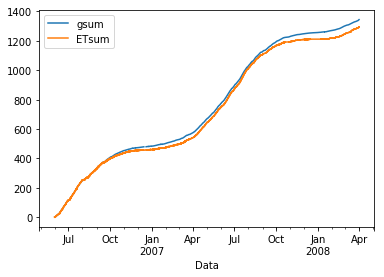

In [41]:
fao_10["ETsum"] = fao_10["ET"].cumsum()
g_use["gsum"].plot(legend=True)
fao_10["ETsum"].plot(legend=True)
plt.show()

### Plot for day 10.6.2006

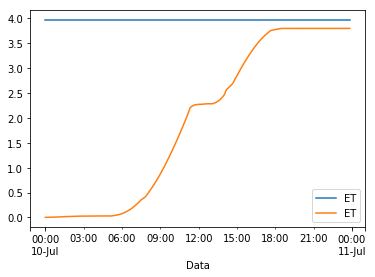

In [63]:
start = "2006-07-10 00:00:00"
end = "2006-07-10 23:50:00"
fao_10["ET"][fao_10["ET"]<0] = 0
#min10_daily = fao_10["ET"].resample("d").sum()

min10_d = fao_10[start:end]["ET"].copy()
min10_d["ETsum"] = min10_d.cumsum()
min10_d["klam"] = (min10_d["ETsum"]/min10_d["ETsum"])*g_use["Data"][start]
min10_d["klam"].plot(legend=True)
min10_d["ETsum"].plot(legend=True)
plt.show()

#### Blue line in upper figure represents  data from the fao_evap file you gave me from Klammler. If you compare it to to the figure.8 in Klammler article (Determining water and nitrogen balances for beneficial managementpractices using lysimeters at Wagna test site (Austria)) under Discussions, you can see that the value for daily data is not the same